Carregando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

Importando o arquivo de vendas "Advertising.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Inspecionando os 10 primeiros objetos.

In [ ]:
df_adv = pd.read_csv('/content/drive/MyDrive/Data/Advertising.csv')
df_adv = df_adv.iloc[: , 1:] #remove primeira coluna.
df_adv.head(10)

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   10.6

Calculando resumos estatísticos de todos os atributos.

In [ ]:
df_adv.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

Plotando histogramas de cada coluna.

array([[<Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'radio'}>,
        <Axes: title={'center': 'newspaper'}>]], dtype=object)

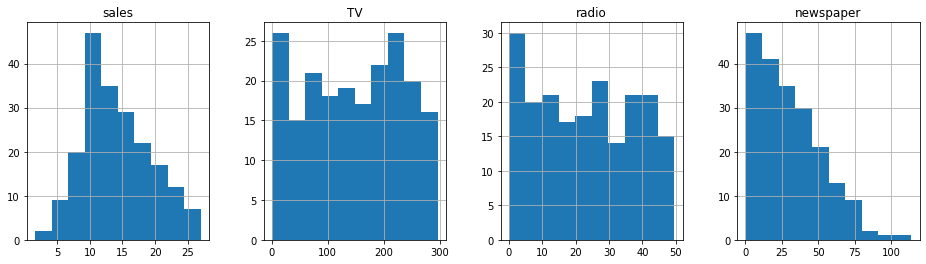

In [ ]:
df_adv.hist(column=["sales","TV", "radio","newspaper"], layout=(1,4), figsize=(16,4))

Plotando gráficos de correlação.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='TV', ylabel='sales'>

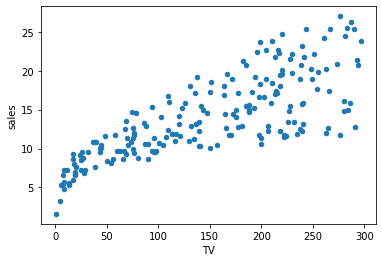

In [ ]:
df_adv.plot.scatter(x='TV', y='sales')

<Axes: xlabel='TV', ylabel='sales'>

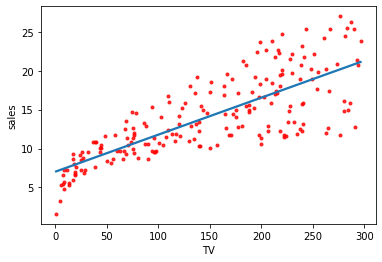

In [ ]:
sns.regplot(x=df_adv.TV, y=df_adv.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})

<Axes: xlabel='radio', ylabel='sales'>

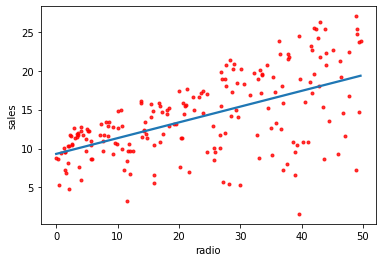

In [ ]:
sns.regplot(x=df_adv.radio, y=df_adv.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})

<Axes: xlabel='newspaper', ylabel='sales'>

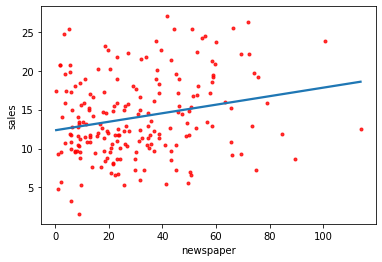

In [ ]:
sns.regplot(x=df_adv.newspaper, y=df_adv.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})

Estimando o modelo TV.

In [ ]:
est = smf.ols('sales ~ TV', df_adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.47e-42
Time:                        22:51:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calculando o erro padrão residual (RSE).

In [ ]:
np.sqrt(est.mse_resid)

3.258656368650463

Plotando o modelo TV contra os dados de treinamento.

Text(0, 0.5, 'Sales')

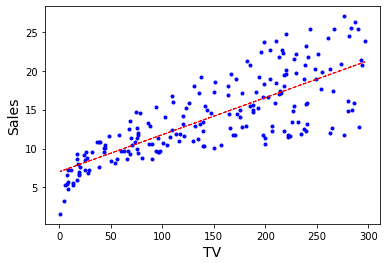

In [ ]:
plt.plot(df_adv.TV, df_adv.sales, "b.")
plt.plot(df_adv.TV, est.predict(df_adv).values.reshape(-1,1), "r--", linewidth=1, label="val")
plt.xlabel("TV", fontsize=14) 
plt.ylabel("Sales", fontsize=14)              

Repetindo para rádio.

In [ ]:
est = smf.ols('sales ~ radio', df_adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           4.35e-19
Time:                        23:03:45   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
np.sqrt(est.mse_resid)

4.27494435490106

Text(0, 0.5, 'Sales')

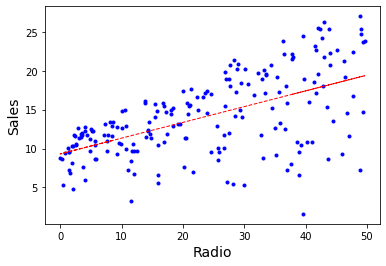

In [ ]:
plt.plot(df_adv.radio, df_adv.sales, "b.")
plt.plot(df_adv.radio, est.predict(df_adv).values.reshape(-1,1), "r--", linewidth=1, label="val")
plt.xlabel("Radio", fontsize=14) 
plt.ylabel("Sales", fontsize=14) 

Repetindo para Jornal.

In [ ]:
est = smf.ols('sales ~ newspaper', df_adv).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 21 Mar 2023   Prob (F-statistic):            0.00115
Time:                        23:08:34   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
np.sqrt(est.mse_resid)

5.092480366520192

Text(0, 0.5, 'Sales')

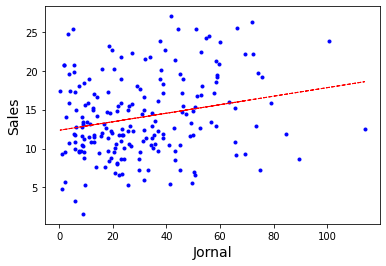

In [ ]:
plt.plot(df_adv.newspaper, df_adv.sales, "b.")
plt.plot(df_adv.newspaper, est.predict(df_adv).values.reshape(-1,1), "r--", linewidth=1, label="val")
plt.xlabel("Jornal", fontsize=14) 
plt.ylabel("Sales", fontsize=14) 

Regressão multivariada.

In [ ]:
est = smf.ols('sales ~ TV + radio + newspaper', df_adv).fit()
est.summary()

Correlação entre os preditores.

In [ ]:
df_adv.corr()

In [ ]:
np.sqrt(est.mse_resid)

Plotando os valores de vendas contra os calores preditos. Se tivermos uma linha de 45 graus temos indício de um bom modelo!

In [ ]:
plt.scatter(est.predict(df_adv).values.reshape(-1,1),df_adv.sales)
#plt.plot(est.predict(df_adv).values.reshape(-1,1), "b.", linewidth=1, label="val")
plt.xlabel("Modelo (TV+Radio+Jornal)", fontsize=14) 
plt.ylabel("Sales", fontsize=14) 

Vamos criar duas subamostras contendo 90% das observações para Treino e 10% das observações para teste.

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_adv,test_size=0.10, random_state=24)

X_train = df_train[['TV','radio','newspaper']].values.reshape(-1,np.size([['TV','radio','newspaper']]))
X_test = df_test[['TV','radio','newspaper']].values.reshape(-1,np.size([['TV','radio','newspaper']]))
y_train = df_train['sales'].values.reshape(-1,1)
y_test = df_test['sales'].values.reshape(-1,1)

Carregamos o pacote de regressão linear do Sci Kit Learn. Ele entrega os mesmos resultados do Stats Models, porém é focado em predição e não explicação dos dados passados.

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)

Os coeficientes estimados pelo método linear para cada feature.

In [ ]:
modelo.coef_

Predições para os dados de treino e teste.

In [ ]:
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

MSE para as projeções de treino e teste.

In [ ]:
from sklearn.metrics import mean_squared_error

MSE_train = mean_squared_error(y_train_pred, y_train)
MSE_test = mean_squared_error(y_test_pred, y_test)

MSE_modelo = [MSE_train, MSE_test]

MSE_modelo